In [7]:
import torch
import torch.nn as nn

INPUT_FEATURES = 2
OUTPUT_NEURONS = 1

activation = nn.Tanh()

# nn.Moduleクラスから継承している
# やることは、全結合層を最初から実装したニューラルネットワークを出力すること
class NeuralNetwork(nn.Module):
  def __init__(self):
    # super(parent class name, )
    super(NeuralNetwork, self).__init__()
    self.layer1 = nn.Linear(
      INPUT_FEATURES,
      OUTPUT_NEURONS
    )

  def forward(self, input):
    output = activation(self.layer1(input))
    return output

model = NeuralNetwork()
model

NeuralNetwork(
  (layer1): Linear(in_features=2, out_features=1, bias=True)
)

In [8]:
weight_array = nn.Parameter(
  torch.tensor([[0.6, -0.2]])
)

bias_array = nn.Parameter(
  torch.tensor([0.8])
)

model.layer1.weight = weight_array
model.layer1.bias = bias_array

params = model.state_dict()

params

OrderedDict([('layer1.weight', tensor([[ 0.6000, -0.2000]])),
             ('layer1.bias', tensor([0.8000]))])

In [10]:
X_data = torch.tensor([[1.0, 2.0]])
print(X_data)

# ここでの計算は、各入力値に重みをかけて、バイアスを足し合わせたものになる
y_pred = model(X_data)

print(y_pred)

tensor([[1., 2.]])
tensor([[0.7616]], grad_fn=<TanhBackward0>)


<bound method Module.named_parameters of NeuralNetwork(
  (layer1): Linear(in_features=2, out_features=1, bias=True)
)>
{'layer1.weight': Parameter containing:
tensor([[ 0.6000, -0.2000]], requires_grad=True), 'layer1.bias': Parameter containing:
tensor([0.8000], requires_grad=True)}


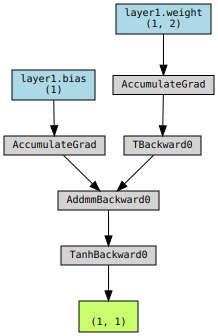

In [15]:
from torchviz import make_dot

print(model.named_parameters)
print(dict(model.named_parameters()))
make_dot(y_pred, params=dict(model.named_parameters()))

In [20]:
x = torch.tensor(1.0, requires_grad=True)

y = x ** 2
print(y)

y.backward()

g = x.grad
print(g)

tensor(1., grad_fn=<PowBackward0>)
tensor(2.)
